In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [6]:
df = pd.read_csv('/Users/diwavila/Desktop/TDDE16_TextMining/PROJECT/twitter_data/players_match2/match2/corpus.csv', sep=';')

In [3]:
path = "/Users/diwavila/Desktop/TDDE16_TextMining/PROJECT/twitter_data/players_match2/match2"
files = [f for f in os.listdir(path) if os.path.splitext(path+f)[1] == '.csv']
df = pd.DataFrame()
for file in files:
    df2 = pd.read_csv(path+'/'+file, sep=';')
    df2['tag'] = df2['tag'].fillna('L')
    df = pd.concat([df, df2], ignore_index = True)

df = df.replace('B', 'N')
df = df.replace('`', 'P')


In [9]:
df = df[['id', 'created_at', 'text', 'tag', 'reply_id', 'quote_id', 'player']]

In [10]:
df

,id,created_at,text,tag,reply_id,quote_id,player
0,1596955509739098114,Sun Nov 27 19:53:58 +0000 2022,@Ferranismo11FCB Que se vaya carvajal y entre ...,L,1.596954e+18,NaN,2
1,1596960117542760449,Sun Nov 27 20:12:16 +0000 2022,"Teniendo a Azpilicueta que es un seguro atrás,...",N,NaN,NaN,2
2,1596975636639514624,Sun Nov 27 21:13:56 +0000 2022,Azpilicueta&gt;&gt;Carcamal\nKoke es una mula ...,N,NaN,NaN,2
3,1596972787327205376,Sun Nov 27 21:02:37 +0000 2022,"el que no me ha gustado nada es Carvajal, muy ...",P,NaN,NaN,2
4,1596972794210029569,Sun Nov 27 21:02:39 +0000 2022,@Ferranismo11FCB Y la verdad prefiero Rodri pi...,P,1.596972e+18,NaN,2
...,...,...,...,...,...,...,...
21104,1596971555803697153,Sun Nov 27 20:57:43 +0000 2022,#Qatar2022 74´⏳|🔥 ¡Más cambios para ambos e...,L,NaN,1.596965e+18,10
21105,1596971565383847937,Sun Nov 27 20:57:46 +0000 2022,@_Futbolero_ Le salió mal la jugada a lucho. N...,N,1.596970e+18,NaN,10
21106,1596971571884630016,Sun Nov 27 20:57:47 +0000 2022,"España puede lograrlo...pero no con Olmo, Asen...",L,NaN,NaN,10
21107,1596971573030064128,Sun Nov 27 20:57:47 +0000 2022,@adrianceitor_ Dirás de Asensio,L,1.596951e+18,NaN,10


In [19]:
df['tag'] = df['tag'].fillna('L')

/var/folders/m_/sjy4yzd51kx41_rt51gdxtm00000gn/T/ipykernel_34268/2263649832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag'] = df['tag'].fillna('L')


In [23]:
df = df.replace('B', 'N')

In [10]:
aux = pd.DataFrame({'count' : df.groupby( [ "tag", "player"] ).size()}).reset_index()
aux2 = pd.DataFrame({'count' : df.groupby( [ "tag"] ).size()}).reset_index()
aux3 = pd.DataFrame({'count' : df.groupby ( ["player"] ).size()}).reset_index()

<AxesSubplot:xlabel='player', ylabel='count'>

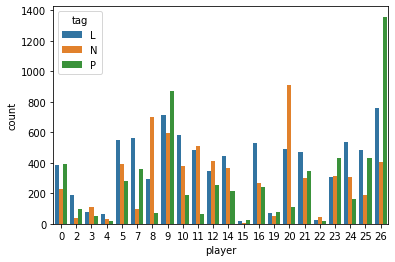

In [11]:
sns.barplot(data=aux, x="player", y="count", hue="tag")

<AxesSubplot:xlabel='tag', ylabel='count'>

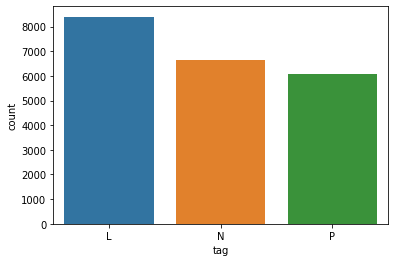

In [12]:
sns.barplot(data=aux2, x="tag", y="count")

<AxesSubplot:xlabel='player', ylabel='count'>

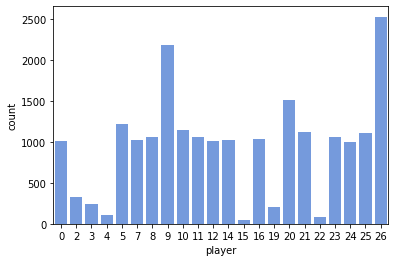

In [15]:
sns.barplot(data=aux3, x="player", y="count", color='cornflowerblue')

In [16]:
# x cada player: tag / sum count -> %
player_sum = aux.groupby(['player', 'tag'])['count'].sum().reset_index()
# pivot -> count of tag by player
pivoted_df = player_sum.pivot_table(index='player', columns='tag', values='count', aggfunc='sum', fill_value=0)
total_count= pivoted_df.sum(axis=1)

percentages = (pivoted_df.divide(total_count, axis=0)*100).round(2)
max_tag = percentages.idxmax(axis=1)

percentages['max_value'] = max_tag
percentages.loc[percentages['max_value'] == 'P', 'max_value'] = 'positive'
percentages.loc[percentages['max_value'] == 'N', 'max_value'] = 'negative'
percentages.loc[percentages['max_value'] == 'L', 'max_value'] = 'neutral'

percentages

tag,L,N,P,max_value
player,,,,
0,38.17,22.76,39.07,positive
2,57.49,11.93,30.58,neutral
3,32.63,46.61,20.76,negative
4,58.56,26.13,15.32,neutral
5,45.00,32.05,22.95,neutral
7,55.01,9.43,35.56,neutral
8,27.59,65.73,6.69,negative
9,32.81,27.32,39.86,positive
10,50.48,33.16,16.36,neutral


In [5]:
# divide train test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['tag'])
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) #14776, 6333

In [20]:
# RANDOM BASELINES
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train["text"] ,y_train )
dummy_clf.score(X_train["text"] , y_train)

0.33845425013535463

In [21]:
dummy_clf_mf = DummyClassifier(strategy="most_frequent")
dummy_clf_mf.fit(X_train["text"] ,y_train )
dummy_clf_mf.score(X_train["text"] , y_train)

0.397265836491608

In [31]:
!python3 -m spacy download es_core_news_sm

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 12.9 MB 2.0 MB/s            
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [56]:
!pip install num2words

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 125 kB 537 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=e5dc018b1f51b1fd3013d5be541eec77e4874f40c3e41a63c7171d484bb3cc9f
  Stored in directory: /Users/diwavila/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils conf

In [ ]:
from num2words import num2words

In [7]:
'''
PREPROCESS:
    - Quitar stopwords: spacy decide que la mayoria de palabras son stopwords en castellano asi que quitaremos:
        - ADP, AUX, DET, INTJ, PART, PRON, PROPN, PUNCT(?), SYM
    - coger el lemma
    - convertir todo a lowercase -> token.lemma_.lower()
    - convertir numeros a numeros (texto) -> token.like_num (bool) to know wether it is a number, 
        then import num2words -> num = num2words(int(token.lemma_), lang='es'). SPACY NO FUNCIONA CON CASTELLANO
    - treure links
    - RETURN list tokens 
'''

nlp = spacy.load('es_core_news_sm')
cat_set = {'ADP', 'AUX', 'DET', 'INTJ', 'PART', 'SYM', 'PUNCT'} 

def preprocess(text):
    doc = nlp(text)
    return [
        num2words(int(token.lemma_), lang='es') if (token.like_num and not token.is_alpha) else token.lemma_.lower()
        for token in doc
        if not token.like_url and token.tag_ not in cat_set
    ] # QUE HAGO CON LOS DECIMALES Y LAS FRACCIONES



In [103]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=c0120a47cbad74c7446f9d52b9bbb4bae7204d5c3e42138bd388b9c9a95b4712
  Stored in directory: /Users/diwavila/Library/Caches/pip/wheels/a0/4a/5b/d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.3.0/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
print(preprocess('Que buena definición de Morata y el pase de lujo de Jordi. Como no disfrutar del buen juego.'))

['que', 'buen', 'definición', 'morata', 'y', 'pase', 'lujo', 'jordi', 'como', 'no', 'disfrutar', 'buen', 'juego']


In [9]:
print(preprocess('HORA DE ALEJANDRO BALDE'))

['hora', 'alejandro', 'balde']


In [25]:
print(preprocess('Buenos días! 2 elefantes no saltaban por las nubes y tres girafas estaban dentro: https://hola.com'))

['buenos', 'día', '2', 'elefante', 'no', 'saltar', 'nube', 'y', 'tres', 'girafa', 'estar', 'dentro']


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [27]:
# model 1: multinomial naive bayes
# Feature extraction: count vectorizer > tf-idf perquè suposarem que no hi haurà moltes paraules úniques 
# (dataset bastant específic i mateix perfil de gent)
model1 = Pipeline([   
    ('vect', CountVectorizer(tokenizer=preprocess)), 
    ('clf', MultinomialNB()), 
])

model1.fit(X_train["text"]  , y_train)
predicted = model1.predict(X_test["text"])

In [28]:
print(classification_report(y_test, predicted, labels=['L', 'N', 'P'])) #fer-ho per jugador

              precision    recall  f1-score   support

           L       0.64      0.51      0.57      2528
           N       0.56      0.74      0.64      1998
           P       0.62      0.58      0.60      1807

    accuracy                           0.60      6333
   macro avg       0.61      0.61      0.60      6333
weighted avg       0.61      0.60      0.60      6333



In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

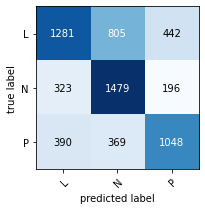

In [42]:
confMatrix = confusion_matrix(  y_test, predicted )
fig, ax = plot_confusion_matrix(conf_mat=confMatrix, figsize=(3, 3) , class_names=['L', 'N', 'P'])
plt.show()

In [ ]:
# Balanced dataset

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler( )
SubsetX, SubsetY = rus.fit_resample(X_train, y_train)

In [34]:
model1b = Pipeline([   
    ('vect', CountVectorizer(tokenizer=preprocess)), 
    ('clf', MultinomialNB()), 
]) # realment mateix model que el 1, simplement fit amb els nous datos i ale

model1b.fit(SubsetX["text"]  , SubsetY)
predicted1b = model1b.predict(X_test["text"])

In [35]:
print(classification_report(y_test, predicted1b, labels=['L', 'N', 'P'])) #fer-ho per jugador

              precision    recall  f1-score   support

           L       0.69      0.43      0.53      2528
           N       0.54      0.76      0.63      1998
           P       0.60      0.65      0.62      1807

    accuracy                           0.60      6333
   macro avg       0.61      0.61      0.59      6333
weighted avg       0.62      0.60      0.59      6333



In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# same pipeline as model1
parameters = {'vect__binary':(True, False), 'vect__ngram_range':[(1,1) , (1,2)] , 'clf__alpha':[1 , 0.1, 0.5]}
cross_val = GridSearchCV(model1, parameters , cv = 5)
cross_val.fit(X_train["text"]  , y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function preprocess at 0x122b1ad30>)),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [1, 0.1, 0.5],
                         'vect__binary': (True, False),
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [45]:
print("Best parameter (CV score=%0.3f):" % cross_val.best_score_)
print(cross_val.best_params_)

Best parameter (CV score=0.622):
{'clf__alpha': 0.5, 'vect__binary': False, 'vect__ngram_range': (1, 2)}


In [51]:
best_nb = Pipeline([   
    ('vect', CountVectorizer(binary=False, tokenizer=preprocess, ngram_range=(1,2))), 
    ('clf', MultinomialNB(alpha=0.5)), 
])

best_nb.fit(X_train["text"]  , y_train)
nb_predicted = best_nb.predict(X_test["text"])

In [52]:
print(classification_report(y_test, nb_predicted, labels=['L', 'N', 'P'])) #fer-ho per jugador

              precision    recall  f1-score   support

           L       0.65      0.52      0.57      2528
           N       0.57      0.73      0.64      1998
           P       0.64      0.62      0.63      1807

    accuracy                           0.61      6333
   macro avg       0.62      0.62      0.62      6333
weighted avg       0.62      0.61      0.61      6333

